# Exploratory Data Analysis


In this notebook, we're diving into our dataset to uncover any quirks or problems that might affect our ability to predict the winner of the March Madness tournament. We'll be exploring the data thoroughly, fixing any issues we find along the way. By the end, we aim to have a clean and reliable dataset that will help us make accurate predictions

We will be importing several datasets for our analysis, each serving a specific purpose:

- MTeams.csv: This dataset contains information about team participants, including their TeamID, name, and the first and last Division 1 seasons they participated in.
- MSeasons.csv: Here, we find details about the seasons and the regions they represent.

- MNCAATourneySeeds.csv: This dataset provides information about the team seedings and their respective TeamIDs.

- MRegularSeasonCompactResults.csv: This dataset includes information about regular season games, such as the seasons, DayNum, winning team ID (WTeamID), winning score (WScore), losing team ID (LTeamID), losing score (LScore), game location (Wloc), and number of overtime periods (NumOT).

- MNCAATourneyCompactResults.csv: Similar to the regular season results, this dataset contains information about tournament games, including the seasons, DayNum, WTeamID, WScore, LTeamID, LScore, Wloc, and NumOT. 

In [1]:
# We are going to import the libraries that we are going to use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [167]:
# We are going to import the data that we are going to use in this project
df_teams = pd.read_csv('../data1/MTeams.csv')
df_season = pd.read_csv('../data1/MSeasons.csv')
df_tourney_seeds = pd.read_csv('../data1/MNCAATourneySeeds.csv')
df_season_results = pd.read_csv('../data1/MRegularSeasonCompactResults.csv')
df_tourney_results = pd.read_csv('../data1/MNCAATourneyCompactResults.csv')

In This section we are going to check a little statitics to see with what we are dealing with. We 

In [5]:
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2023
1,1102,Air Force,1985,2023
2,1103,Akron,1985,2023
3,1104,Alabama,1985,2023
4,1105,Alabama A&M,2000,2023


In [170]:
df_teams.drop(['FirstD1Season', 'LastD1Season'], axis=1, inplace=True)

In [7]:
df_season.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,1984-10-29,East,West,Midwest,Southeast
1,1986,1985-10-28,East,Midwest,Southeast,West
2,1987,1986-10-27,East,Southeast,Midwest,West
3,1988,1987-11-02,East,Midwest,Southeast,West
4,1989,1988-10-31,East,West,Midwest,Southeast


In [8]:
df_season.drop(['DayZero'], axis =1, inplace=True)

In [9]:
df_tourney_seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [10]:
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [11]:
df_season_results.drop(['NumOT'], axis=1, inplace=True)

In [12]:
df_tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [13]:
df_tourney_results.drop(['NumOT'], axis=1, inplace=True)

In [14]:
df_total = pd.concat([df_teams, df_season_results, df_tourney_results])

In [15]:
df_total.head(10)

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1101.0,Abilene Chr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1102.0,Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1103.0,Akron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1104.0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1105.0,Alabama A&M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1106.0,Alabama St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1107.0,SUNY Albany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1108.0,Alcorn St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1109.0,Alliant Intl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1110.0,American Univ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184443 entries, 0 to 2383
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   TeamID    377 non-null     float64
 1   TeamName  377 non-null     object 
 2   Season    184066 non-null  float64
 3   DayNum    184066 non-null  float64
 4   WTeamID   184066 non-null  float64
 5   WScore    184066 non-null  float64
 6   LTeamID   184066 non-null  float64
 7   LScore    184066 non-null  float64
 8   WLoc      184066 non-null  object 
dtypes: float64(7), object(2)
memory usage: 14.1+ MB


In [17]:
df_total['WScore'] = df_total['WScore'].fillna(0)
df_total['LScore'] = df_total['LScore'].fillna(0)
df_total['WTeamID'] = df_total['WTeamID'].fillna(0)
df_total['LTeamID'] = df_total['LTeamID'].fillna(0)
df_total['WLoc'] = df_total['WLoc'].fillna(0)
df_total['DayNum'] = df_total['DayNum'].fillna(0)
df_total['Season'] = df_total['Season'].fillna(0)

In [18]:
df_total.head()

,TeamID,TeamName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1101.0,Abilene Chr,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,1102.0,Air Force,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
2,1103.0,Akron,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,1104.0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
4,1105.0,Alabama A&M,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN


In [19]:
df_total.describe()

TeamID         Season         DayNum        WTeamID  \
count   377.000000  184443.000000  184443.000000  184443.000000   
mean   1289.000000    2001.135440      74.959765    1284.757025   
std     108.974768      91.241366      34.681551     119.661834   
min    1101.000000       0.000000       0.000000       0.000000   
25%    1195.000000    1996.000000      47.000000    1198.000000   
50%    1289.000000    2006.000000      77.000000    1284.000000   
75%    1383.000000    2015.000000     103.000000    1380.000000   
max    1477.000000    2023.000000     154.000000    1477.000000   

              WScore        LTeamID         LScore  
count  184443.000000  184443.000000  184443.000000  
mean       76.590394    1280.406478      64.544976  
std        12.379657     119.706423      11.596986  
min         0.000000       0.000000       0.000000  
25%        69.000000    1191.000000      57.000000  
50%        76.000000    1280.000000      64.000000  
75%        84.000000    1375.000000      72.000000  
max       186.000000    1477.000000     150.000000

In [20]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TeamID    377 non-null    int64 
 1   TeamName  377 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [21]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   39 non-null     int64 
 1   RegionW  39 non-null     object
 2   RegionX  39 non-null     object
 3   RegionY  39 non-null     object
 4   RegionZ  39 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [22]:
df_season.info()
df_tourney_seeds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2490 non-null   int64 
 1   Seed    2490 non-null   object
 2   TeamID  2490 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.5+ KB


In [23]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   181682 non-null  int64 
 1   DayNum   181682 non-null  int64 
 2   WTeamID  181682 non-null  int64 
 3   WScore   181682 non-null  int64 
 4   LTeamID  181682 non-null  int64 
 5   LScore   181682 non-null  int64 
 6   WLoc     181682 non-null  object
dtypes: int64(6), object(1)
memory usage: 9.7+ MB


In [24]:
df_season_results.info()
df_tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2384 non-null   int64 
 1   DayNum   2384 non-null   int64 
 2   WTeamID  2384 non-null   int64 
 3   WScore   2384 non-null   int64 
 4   LTeamID  2384 non-null   int64 
 5   LScore   2384 non-null   int64 
 6   WLoc     2384 non-null   object
dtypes: int64(6), object(1)
memory usage: 130.5+ KB


In [25]:
df_total['WLoc'].value_counts()

WLoc
H    107421
A     55740
N     20905
0       377
Name: count, dtype: int64

# Univariate Analysis

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WScore', ylabel='Count'>

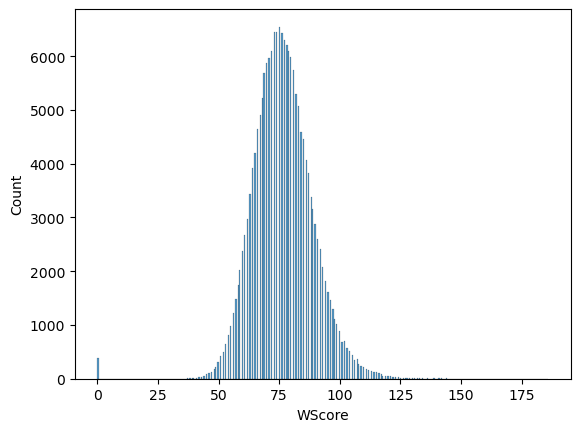

In [26]:
sns.histplot(data=df_total, x = 'WScore')

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LScore', ylabel='Count'>

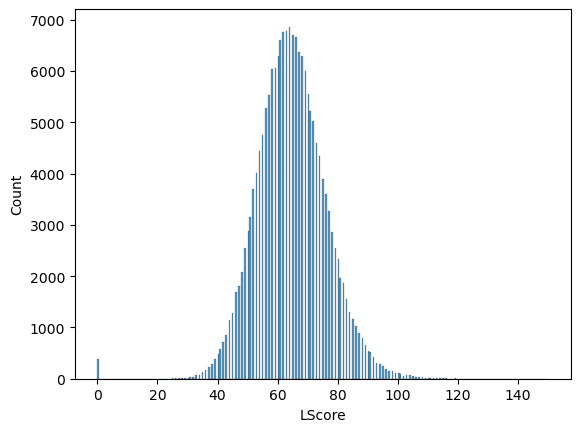

In [27]:
sns.histplot(data=df_total, x = 'LScore')

In [28]:
#sns.histplot(data=df_total, x = 'WLoc')
#ValueError: Unable to parse string "N" at position 378

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

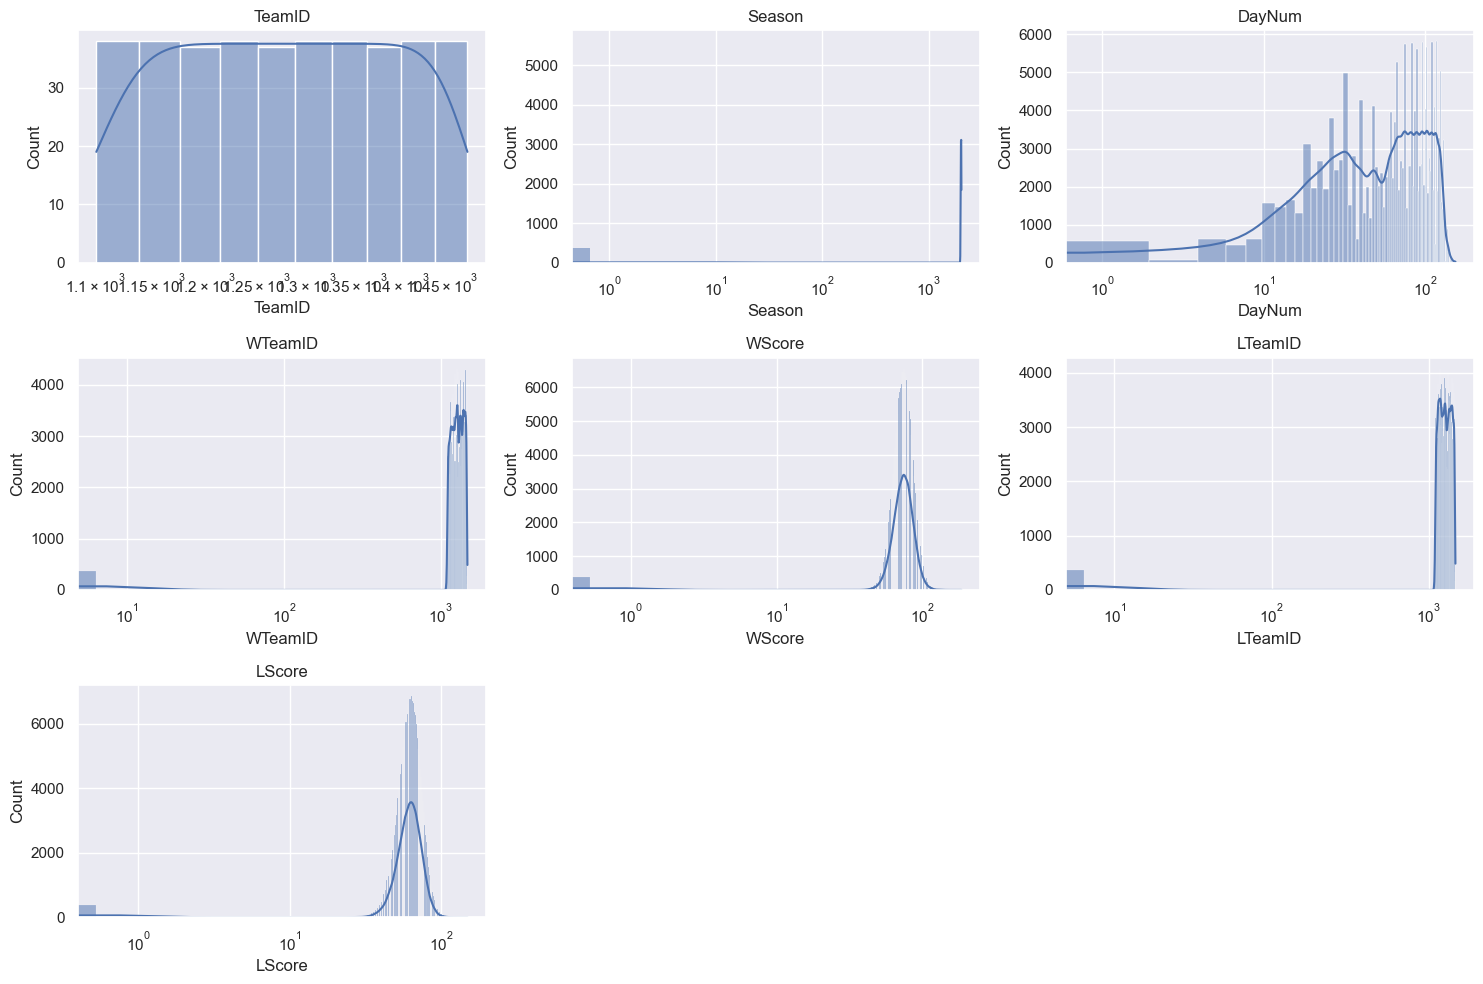

In [29]:
sns.set(style="darkgrid")

# Selecting numerical columns for distribution plots
numerical_cols = df_total.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_total[col], kde=True)
    plt.title(col)
    plt.xscale('log')
    plt.tight_layout()

plt.show()

# Bivariate Analysis

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='WLoc', ylabel='WScore'>

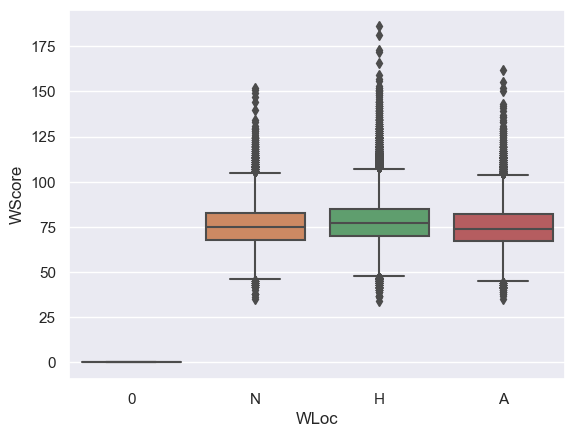

In [30]:
sns.boxplot(data=df_total, y='WScore', x ='WLoc')

c:\Users\Alex\anaconda3\envs\phase1\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


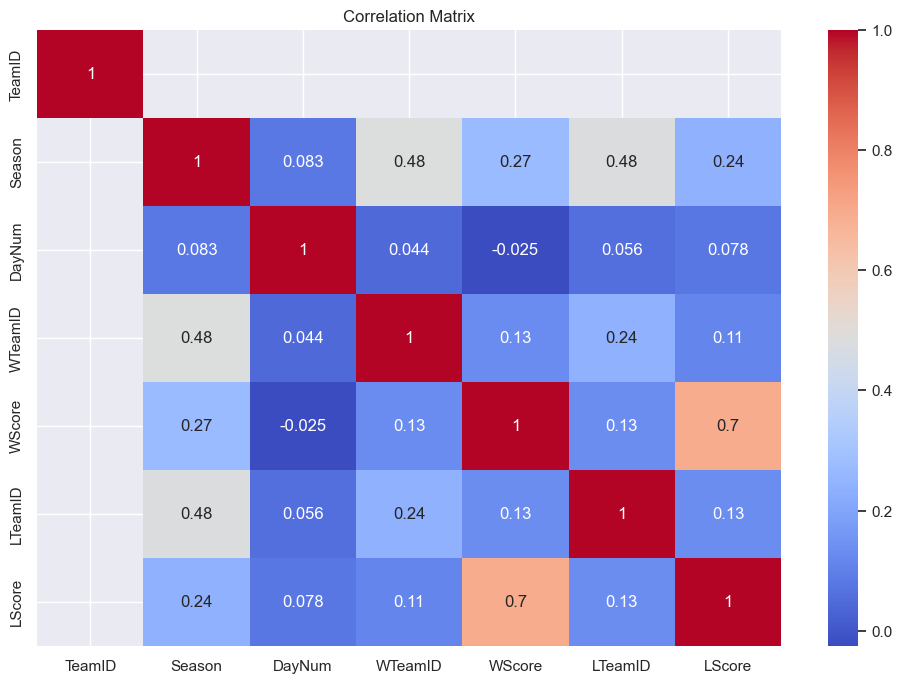

In [31]:
# Correlation Matrix
correlation_matrix = df_total.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

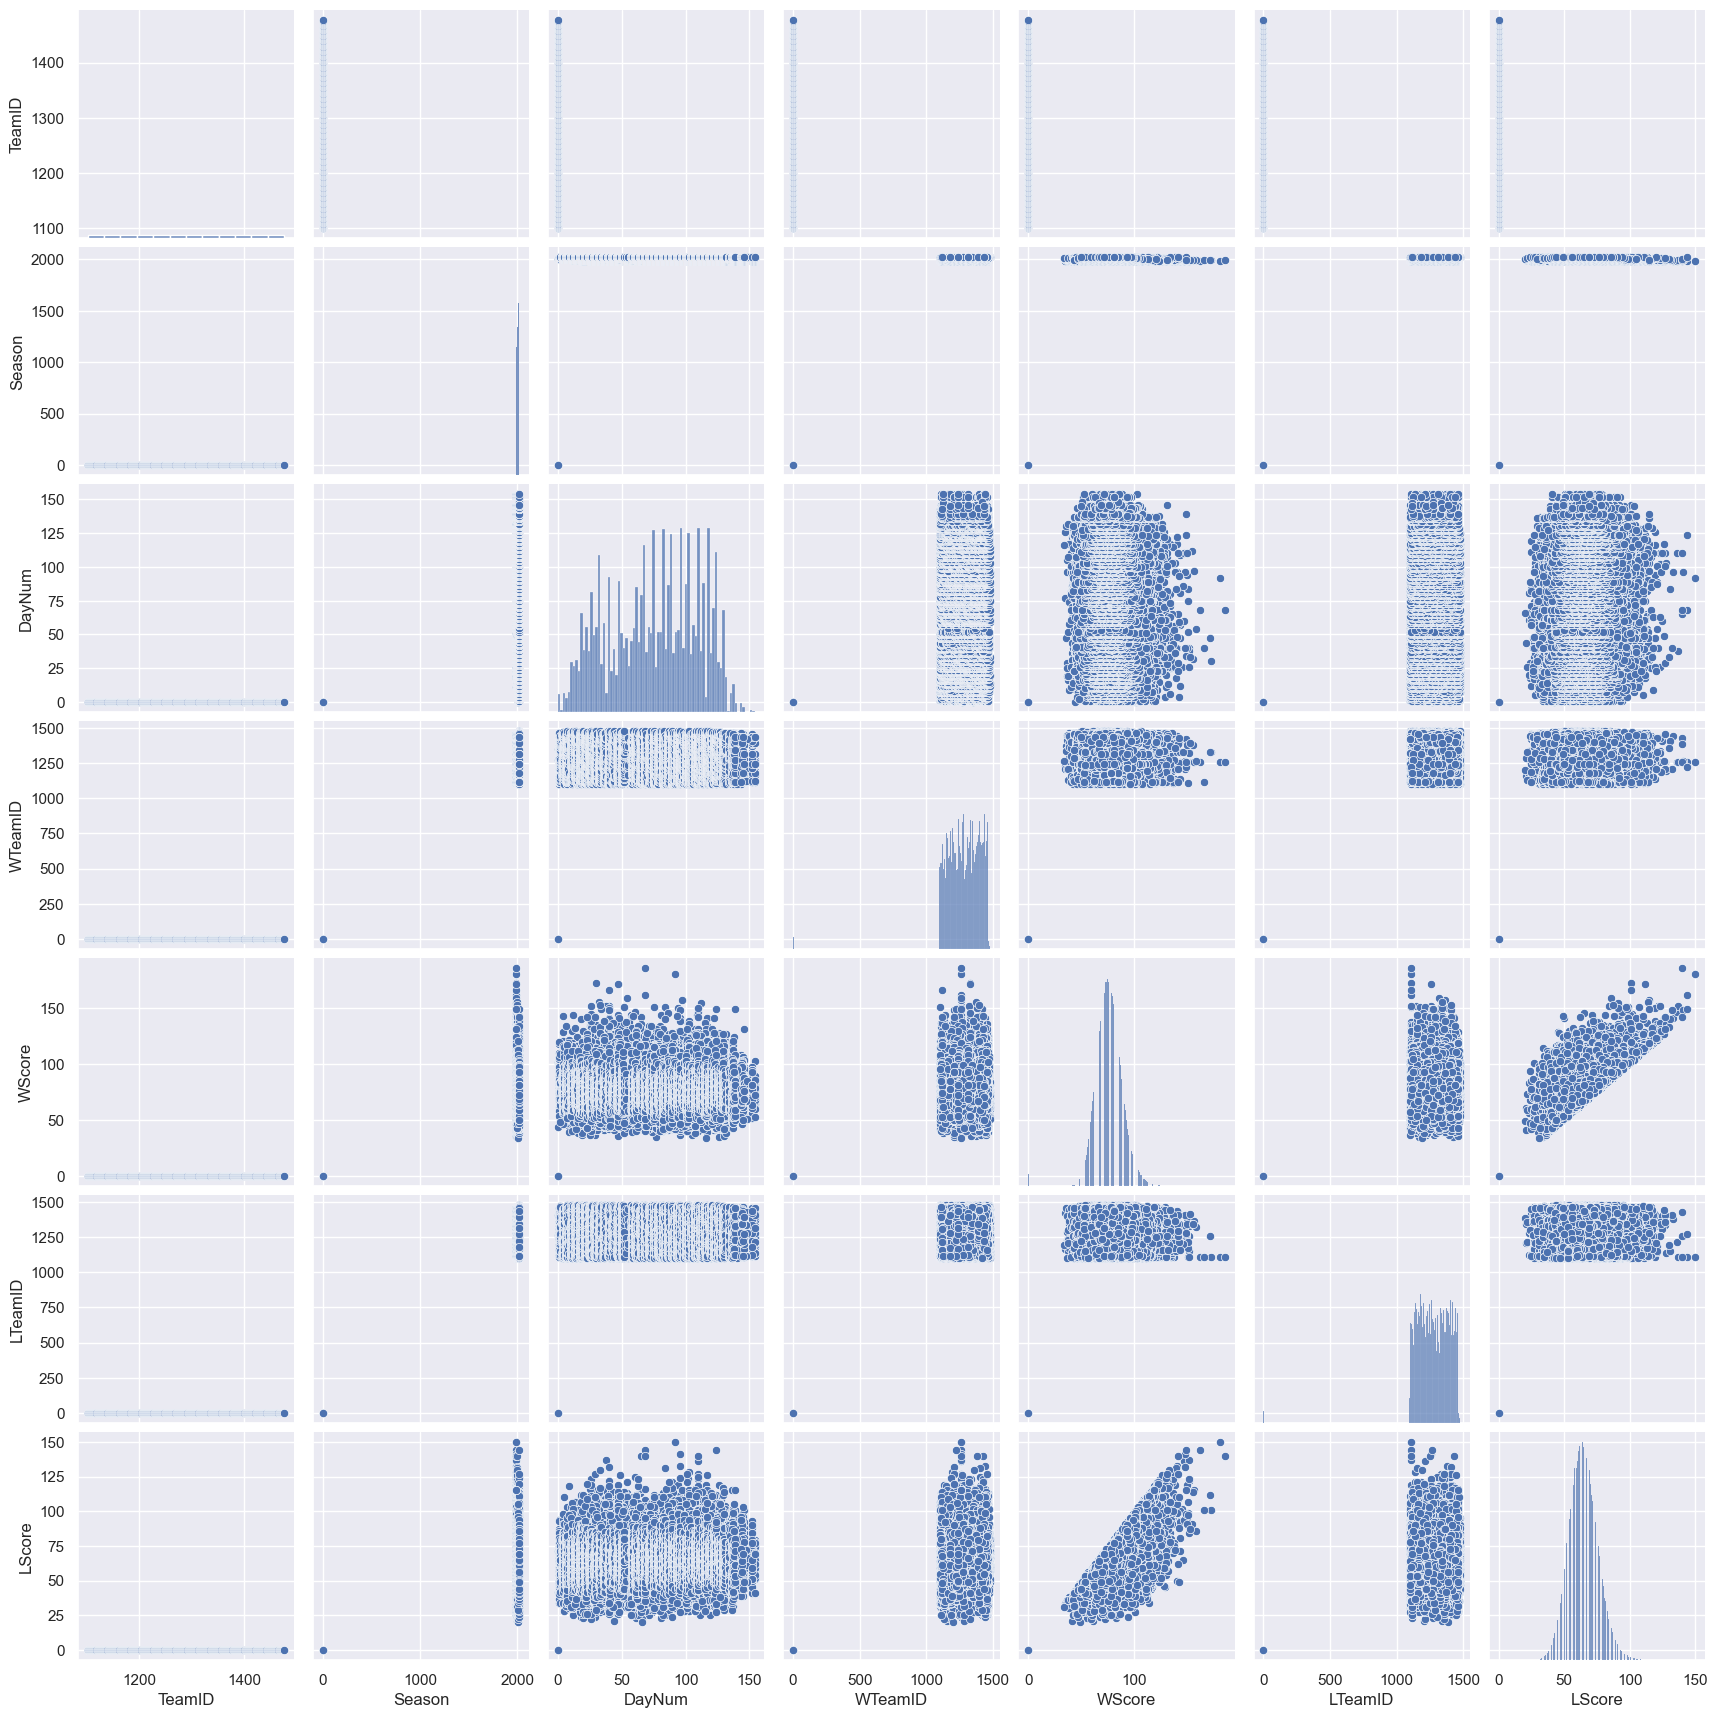

In [32]:
sns.pairplot(df_total)

For the graph on the bottom we are going to use the seaborn graph jointplot we are going to have 3 graphs where the top graph we are just comparing the W score which is the x-axis and then we have y which is the L score. Towards the middle we will have both graphs combined
- The reason for why we are graphing the first one and then the second one is because in the first Graph we can See what they look like all together and the second Graph is to see a better clear look from the Bird point of view and as we can see that there is a bigger cluster and a little more accurate to a certain point.

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

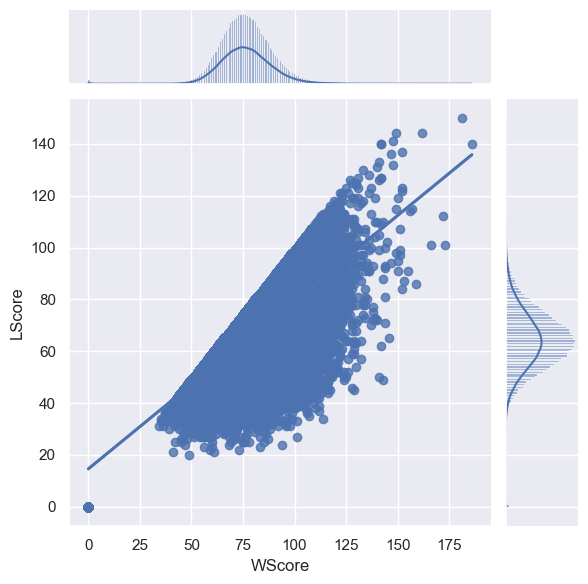

In [33]:
sns.jointplot(data=df_total, x='WScore', y='LScore', kind='reg')

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='WScore', ylabel='LScore'>

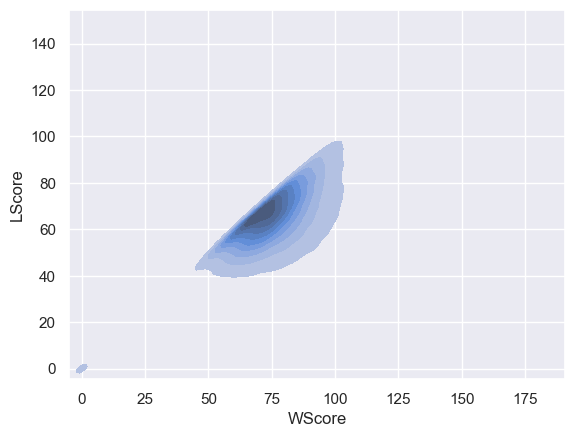

In [34]:
# This is the same as the jointplot above, but with a different kind of plot
sns.kdeplot(data=df_total, x='WScore', y='LScore', fill=True)

In these two graphs we are going to compare and see if there is any relationship with the location and if it affects the score of the team. 
1) the first graph is the amount of point a team Averages when they  are playing Nuetral Away or Home
2) The second one is also the same but this time the average of the losing team when they are put in a Netraul or Home or away. 

The reason on why We are doing this to see if there are any advantages in where the teams play which can help them take a slight lead to win there games 

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


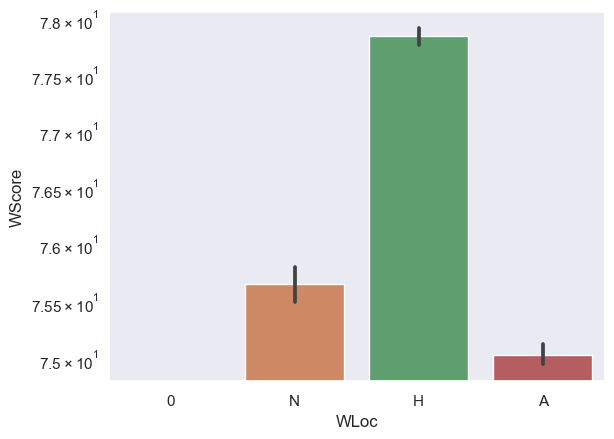

In [48]:
sns.barplot(data=df_total, x='WLoc', y='WScore')
plt.yscale('log')


/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


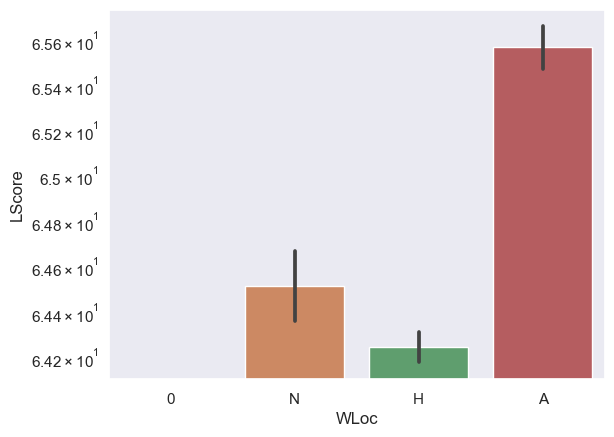

In [49]:
sns.barplot(data=df_total, x='WLoc', y='LScore')
plt.yscale('log')

### Adding a New Data set for our analysis.
- We have decided to analyze the 'MNCAA Tourney Details Results' CSV file in the 'Data2' folder instead of the 'M Regular season' file. This choice reflects a student's perspective, where both competitions are rewarding. However, the tournament setting often brings out a more competitive edge, with teams striving to perform at their peak. This aligns well with the spirit of March Madness, known for its intense competition and the demand for teams to perform at their best.

In [37]:
df_stats= pd.read_csv("../data2/MNCAATourneyDetailedResults.csv")

In [38]:
df_stats.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


### Filtering 
- We will filter our dataset to examine recent tournaments and analyze their potential impact on the upcoming tournament.

In [39]:
df_2022_above= df_stats[df_stats['Season'] >= 2022]
df = df_2022_above
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1181,2022,134,1231,66,1461,58,N,0,26,62,...,19,12,18,7,23,6,18,2,1,17
1182,2022,134,1411,76,1394,67,N,0,23,55,...,21,9,19,7,29,17,8,9,3,22
1183,2022,135,1323,89,1353,87,N,2,37,72,...,27,4,6,13,28,22,13,1,6,15
1184,2022,135,1460,93,1136,82,N,0,29,61,...,24,16,23,10,22,7,13,11,5,24
1185,2022,136,1116,75,1436,71,N,0,24,56,...,24,10,17,5,26,13,6,1,1,21


In [46]:
df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

# Analysis 1 
- As we look through our dataset we can see that there are some columns that we will need to drop in our transformation Notebook and here are some columns we might consider as useless to our analysis
    - DayNum: The reason we are dropping this is because we are not interested in knowing this section 
    - NumOT: we are dropping this column because It will not be important to analysis our data set
    - WFGM: We Are not interested in Learning more about the Field goal of the team 
    - WFGA: This is another one which is almost the same as WFGM but this is for assists
    - Season: The reason why we are dropping this is because we do not have to worry about it anymore since all we wanted was to have the latest status for the upcoming tournoment.

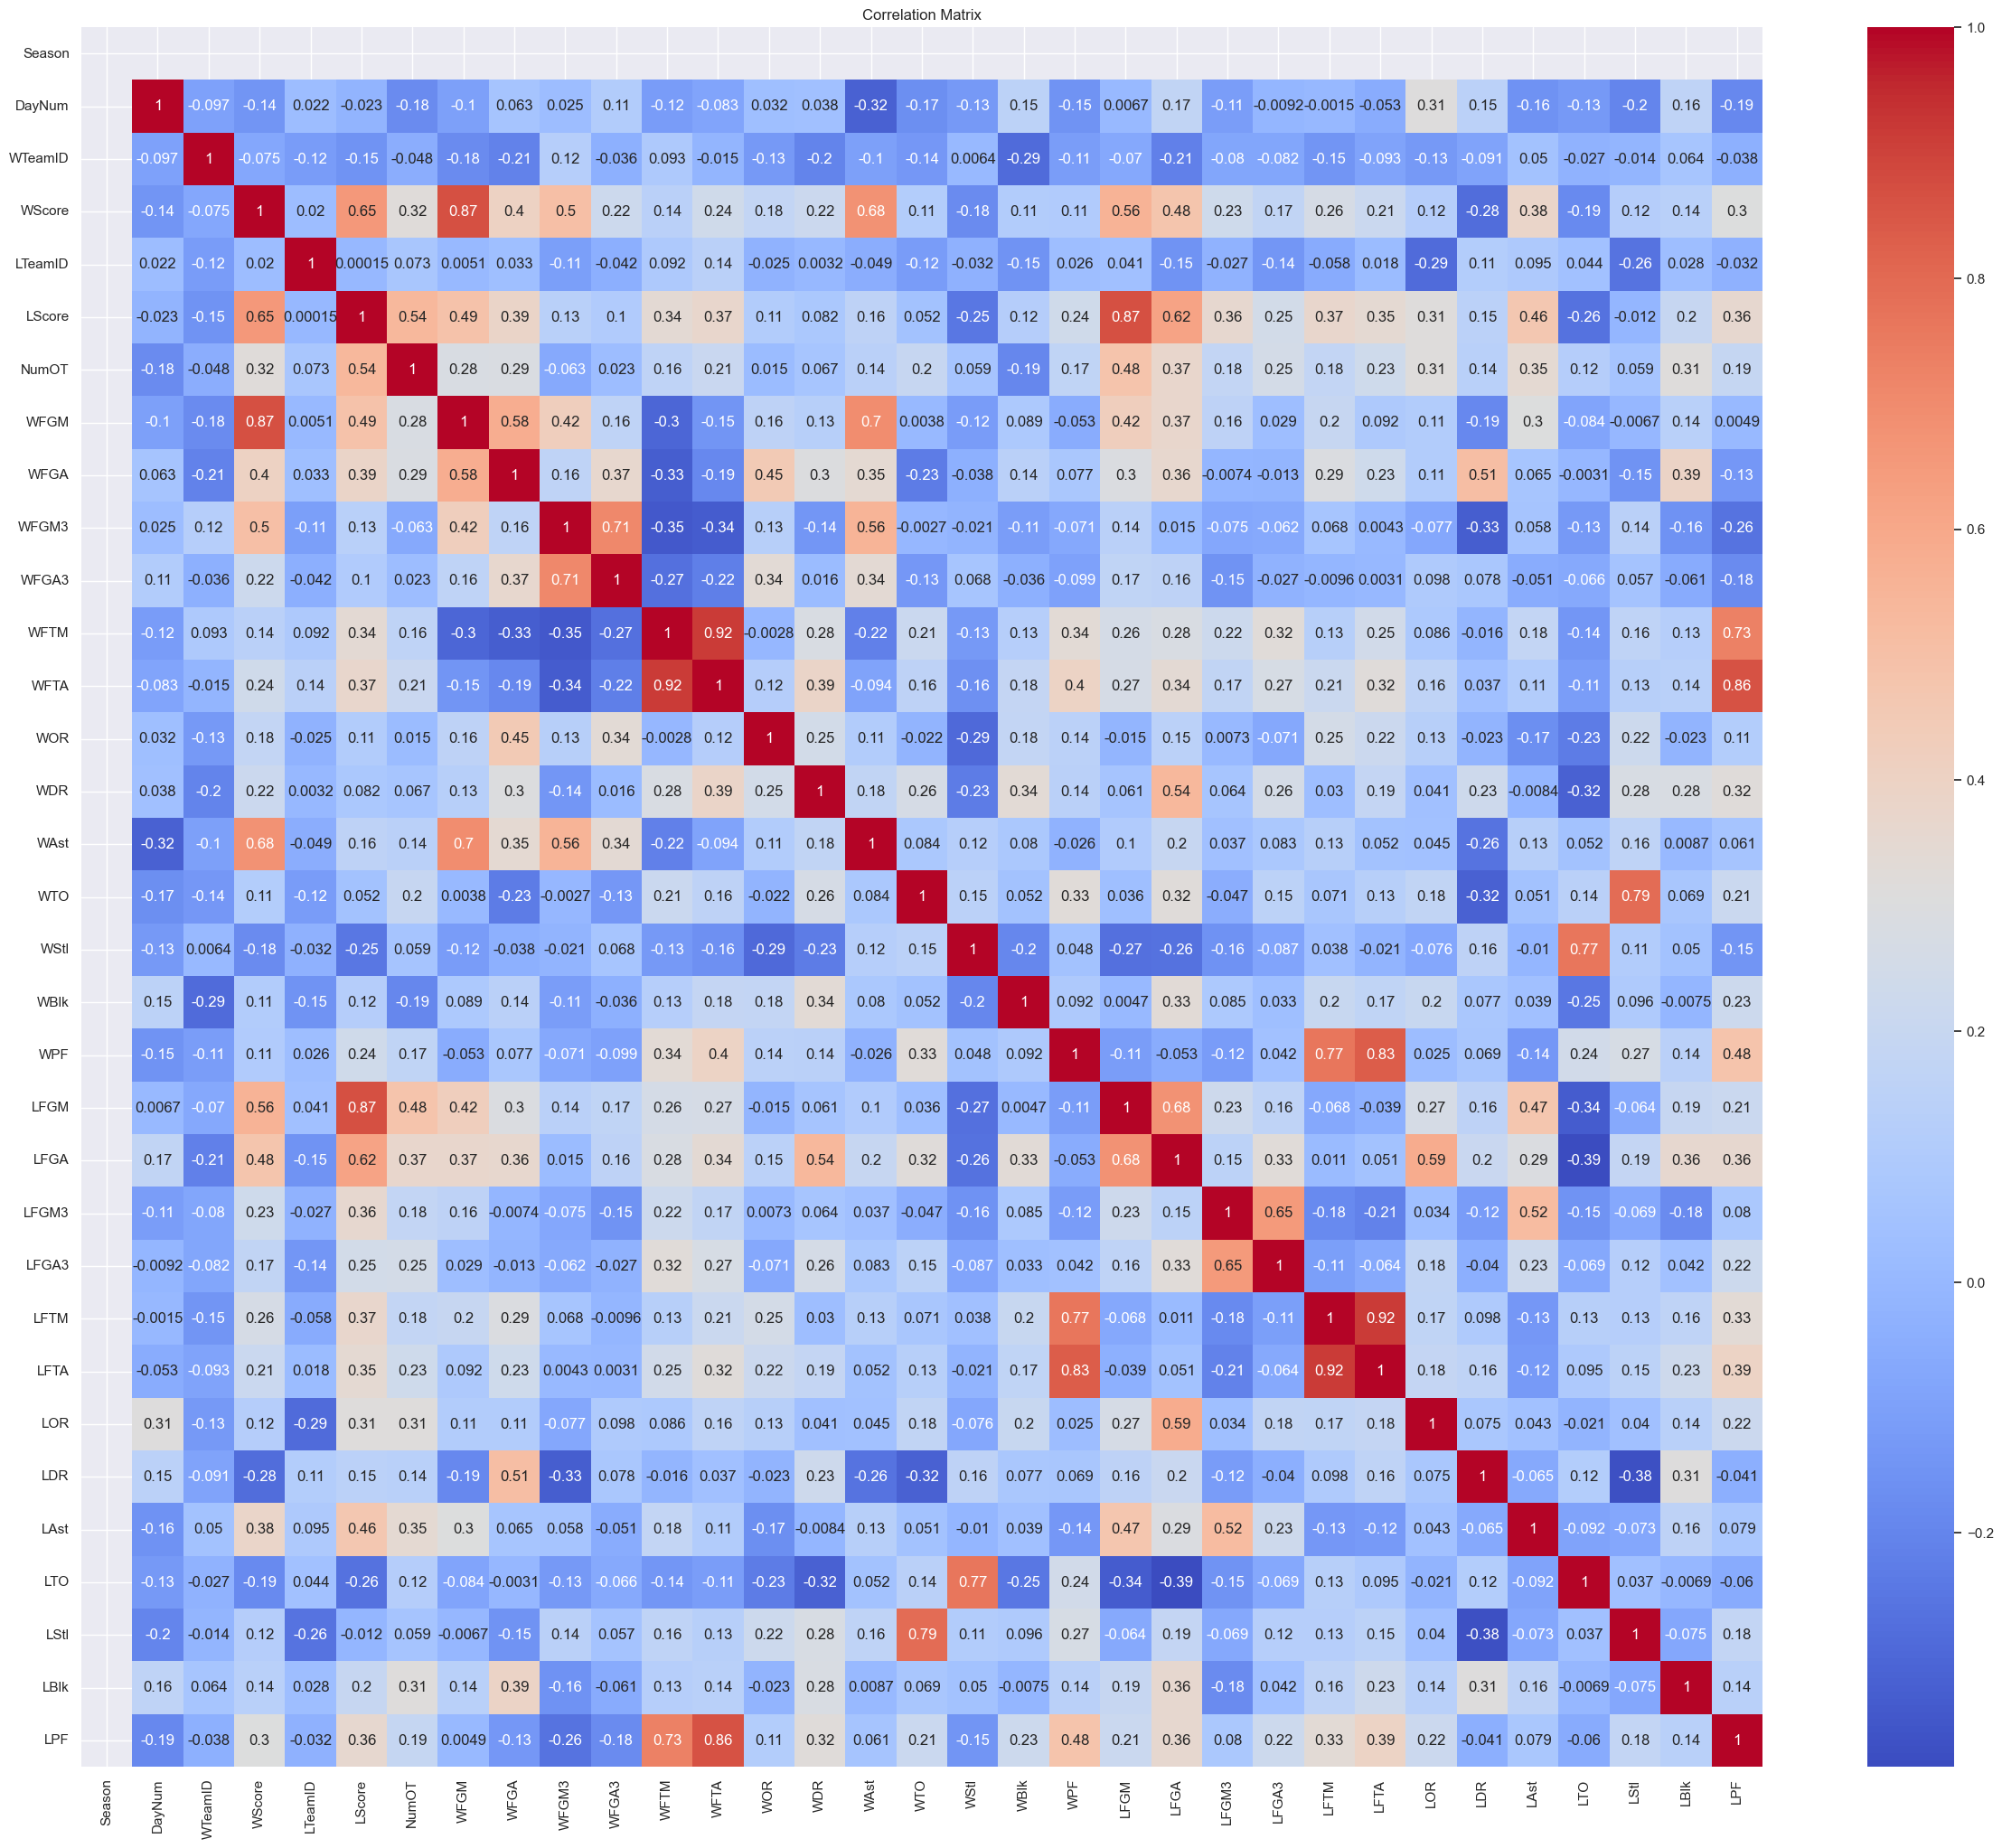

In [44]:
# Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We are comparing here the 3-points made what are the averages of games made within the tournament  and also we are going to see the amount of assists are an average in the tournament 

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WFGM3'>

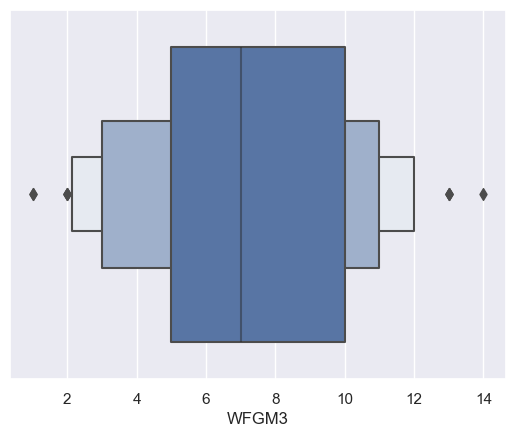

In [73]:
# This is to see The 3-point field goals made by the winning team
sns.boxenplot(data=df, x='WFGM3')


/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WFGA3'>

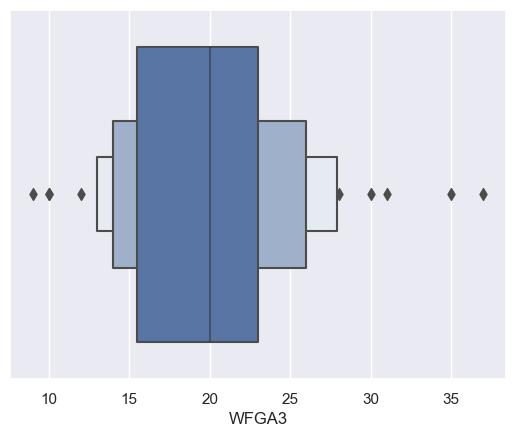

In [74]:
# This is to see The 3-point field goals assist made by the winning team
sns.boxenplot(data=df, x='WFGA3')

For this section we are checking for The amount of Offensive rebound in each game The next chart is also the same but now with the Defensive rebound 

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WOR', ylabel='Count'>

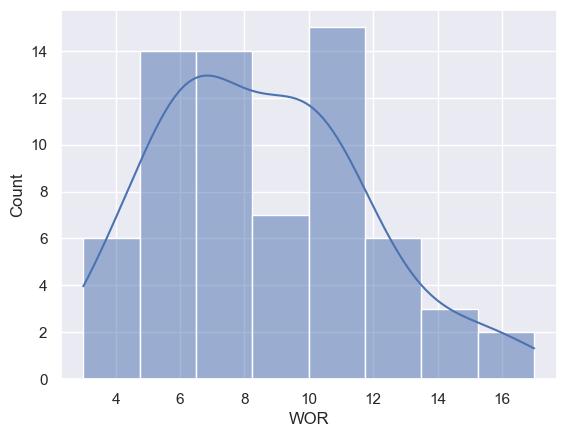

In [99]:
sns.histplot(data=df, x='WOR', kde=True)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WDR', ylabel='Count'>

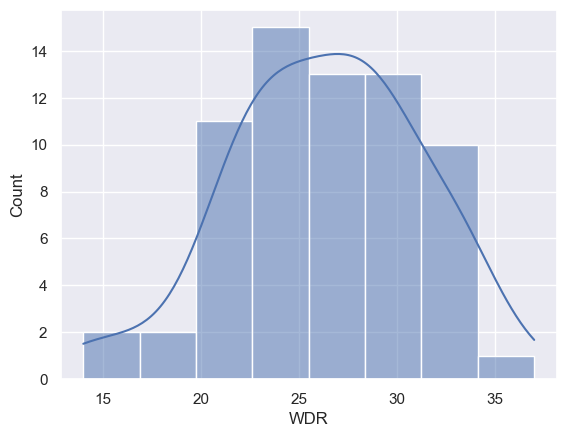

In [98]:
sns.histplot(data=df, x='WDR', kde=True)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WAst', ylabel='Count'>

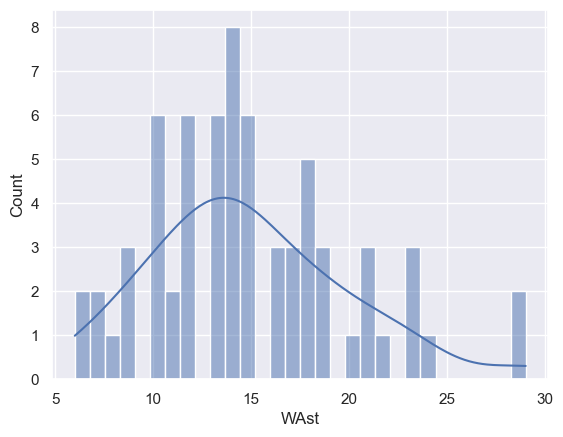

In [97]:
# This is to see the winning team's assists
sns.histplot(data=df, x='WAst', kde=True, bins=30)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WTO', ylabel='Count'>

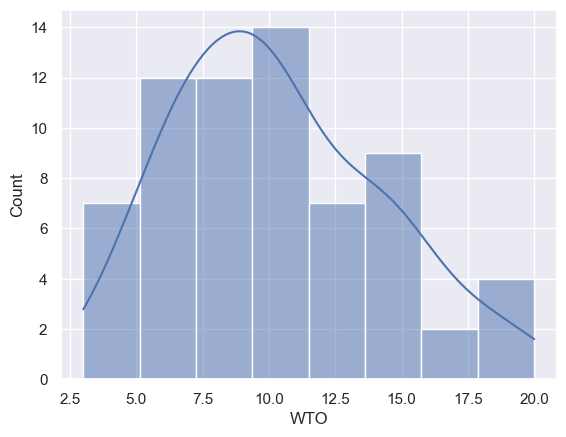

In [102]:
sns.histplot(data=df, x='WTO', kde=True)

### Here We are Writing a loop to see our numerical columns to see and compare the winning team and losing team average states when it comes to playing in tournoments ( This is going to be an alternating for the stuff that i did above so do not look at it yet)

/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alex/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

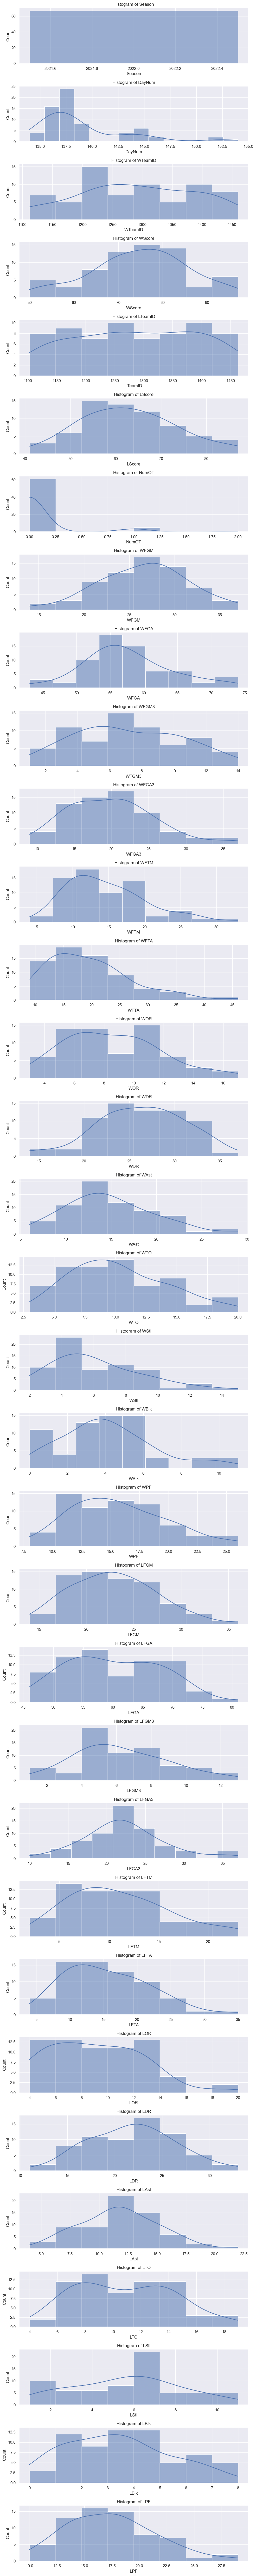

In [116]:
#num_columns = df.select_dtypes(include=['float64', 'int64']).columns
#fig, axes = plt.subplots(nrows=len(num_columns), figsize=(10, 3 * len(num_columns)))
#for col, ax in zip(num_columns, axes): # zip takes two iterables and combines them
#    sns.histplot(df[col], kde=True, ax=ax)
#    ax.set_title(f'Histogram of {col}')
 #   plt.tight_layout()

In [60]:
#df_total.to_csv('../data1/df_total.csv')